# Control 1: Descripción y Análisis Exploratorio de Datos

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391 



In [2]:
import io
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

## Lectura, limpieza y profiling

In [3]:
df = pd.read_csv("lista01.dat", sep="\s+", usecols=['ocupacion', 'educacion','ingreso','mujeres','prestigio','censo','tipo'])
df.head()

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof


In [4]:
df['ocupacion']

0             GOV.ADMINISTRATORS
1               GENERAL.MANAGERS
2                    ACCOUNTANTS
3            PURCHASING.OFFICERS
4                       CHEMISTS
5                     PHYSICISTS
6                     BIOLOGISTS
7                     ARCHITECTS
8                CIVIL.ENGINEERS
9               MINING.ENGINEERS
10                     SURVEYORS
11                   DRAUGHTSMEN
12           COMPUTER.PROGRAMERS
13                    ECONOMISTS
14                 PSYCHOLOGISTS
15                SOCIAL.WORKERS
16                       LAWYERS
17                    LIBRARIANS
18        VOCATIONAL.COUNSELLORS
19                     MINISTERS
20           UNIVERSITY.TEACHERS
21       PRIMARY.SCHOOL.TEACHERS
22     SECONDARY.SCHOOL.TEACHERS
23                    PHYSICIANS
24                 VETERINARIANS
25      OSTEOPATHS.CHIROPRACTORS
26                        NURSES
27                 NURSING.AIDES
28              PHYSIO.THERAPSTS
29                   PHARMACISTS
          

In [97]:
df.groupby('censo').size().to_frame('n').sort_values('n', ascending=False).head()

,n
censo,
8215,2
1113,1
6191,1
8311,1
8278,1


In [98]:
df[df.censo==8215]

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo,tipo_numeric
70,SLAUGHTERERS.1,7.64,5134,17.26,25.2,8215,bc,0.0
71,SLAUGHTERERS.2,7.64,5134,17.26,34.8,8215,bc,0.0


`censo` no es la llave porque separan *slaughterers* en dos (sólo cambia el prestigio).

In [100]:
df.groupby('ocupacion').size().to_frame('n').sort_values('n', ascending=False).head()

,n
ocupacion,
ACCOUNTANTS,1
PLUMBERS,1
RECEPTIONSTS,1
REAL.ESTATE.SALESMEN,1
RAILWAY.SECTIONMEN,1


`ocupación` sí es la llave primaria.

## Clasificación de variables:

In [4]:
df.describe()

,educacion,ingreso,mujeres,prestigio,censo
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


In [7]:
df.dtypes

ocupacion     object
educacion    float64
ingreso        int64
mujeres      float64
prestigio    float64
censo          int64
tipo          object
dtype: object

Por los descripciones automáticas anteriores podemos concluir que:

+ `ocupacion`: la llave única de la tabla.
+ `educacion`: continua (mayor a 0)
+ `ingreso`: continua (mayor a 0)
+ `mujeres`: continua 
+ `prestigio`: continua
+ `censo`: categórica sin orden (casi biyecta con la llave única)
+ `tipo`: categórica sin orden

## Exploratorio

### Ingreso vs. Educación vs. Prestigio

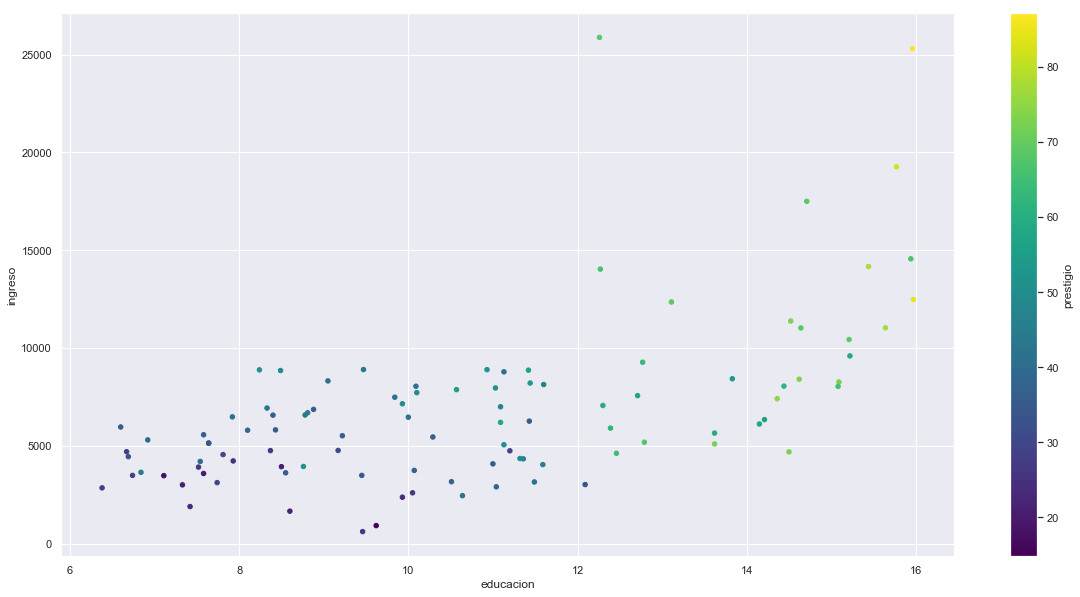

In [23]:
fig, ax = plt.subplots()
df.plot.scatter(x='educacion',y='ingreso',c='prestigio', colormap='viridis',ax=ax)

Para empezar, el ingreso es creciente con respecto a la educación. Asimismo, mientras el nivel de educación crece, las ocupaciones se consideran más prestigiosas. Luego, el prestigio crece mientras el nivel de ingreso es mayor. También, los datos muestran que las ocupaciones con alto nivel de ingreso, educación y prestigio son escasas. 

### Mujeres vs. Ingreso vs. Prestigio

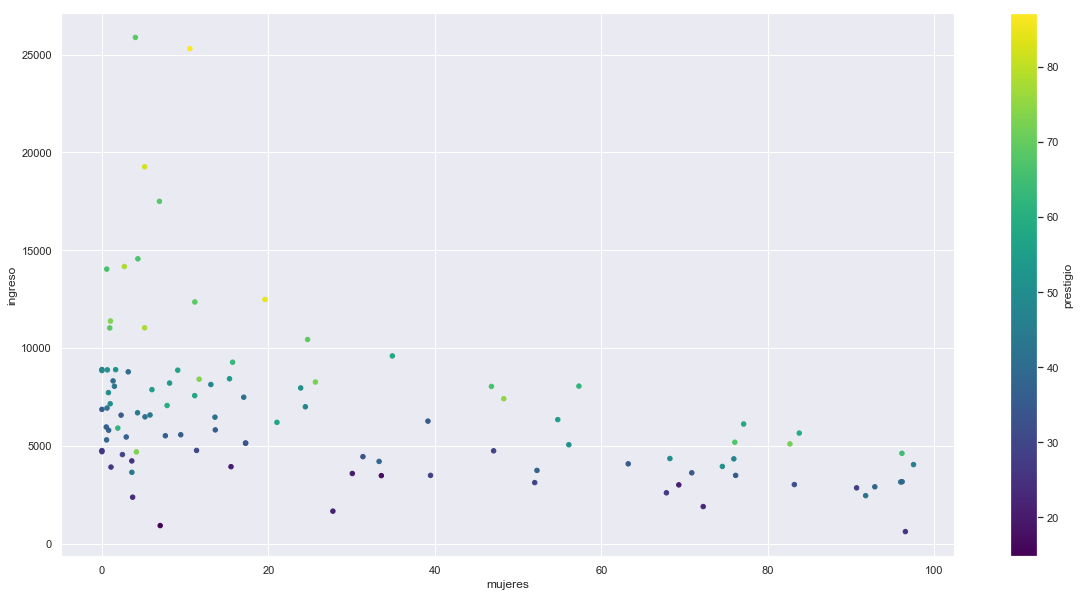

In [22]:
fig, ax = plt.subplots()
df.plot.scatter(x='mujeres',y='ingreso',c='prestigio',colormap='viridis',ax=ax)

El ingreso tiene una ligera tendencia decreciente a medida que el porcentaje de mujeres en la ocupación crece. Los datos no muestran una relación marcada entre el porcentaje de mujeres y el prestigio. Sin embargo, se observa que la cantidad de ocupaciones con alto nivel de prestigio es decreciente con respecto a la mujeres en la ocupación; es decir, a mayor porcentaje de mujeres se observa una caída en la cantidad de ocupaciones con prestigio mayor a 50. También, vale la pena destacar la acumulación de ocupaciones con un bajo porcentaje de mujeres, en particular aquellas con ingreso mayor a 5000 y prestigio mayor a 60.

### Ingreso

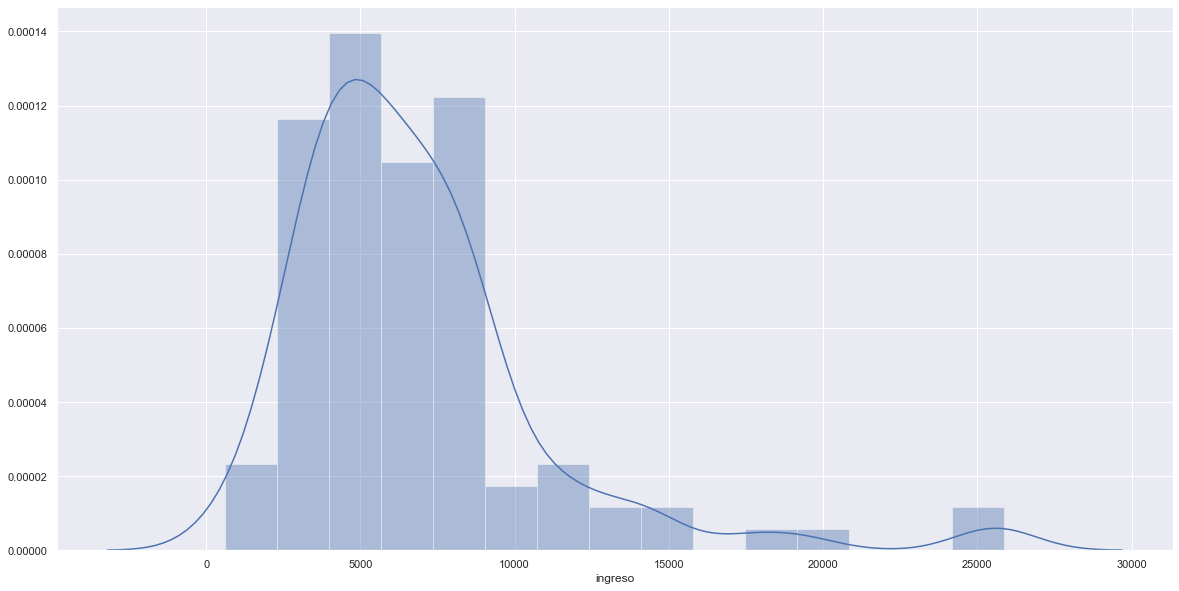

In [19]:
sns.distplot(df.ingreso)

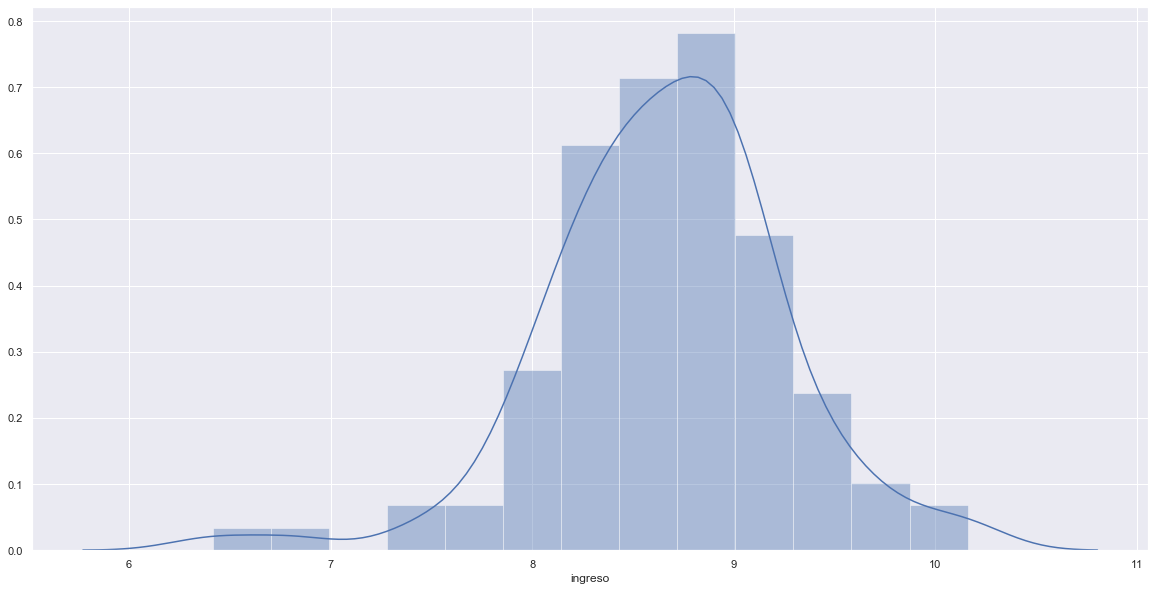

In [21]:
sns.distplot(np.log(df.ingreso))

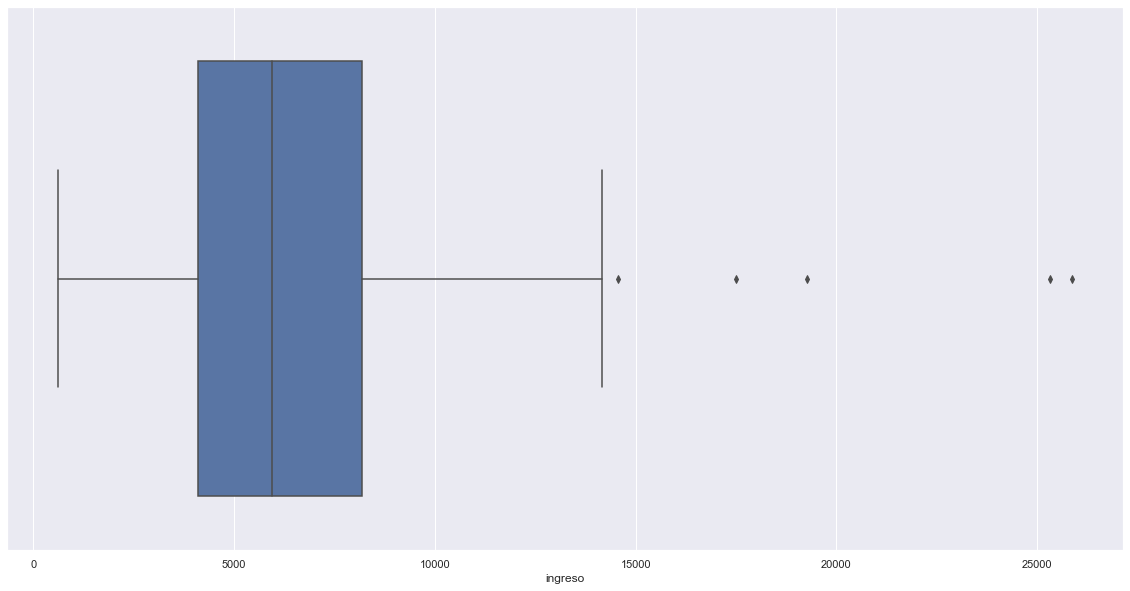

In [20]:
sns.boxplot(df.ingreso)

La mitad de las ocupaciones generan un ingreso de 6000 o menos, mientras que 5 ocupaciones generan 15000 o más. Las dos ocupaciones con mayor ingreso generan por lo menos 4.5 veces más que la mitad de todas las ocupaciones. Asimismo, el 75% de los trabajos generan a los más una tercera parte de lo que ingresan los dos mejor remunerados.

### Mujeres

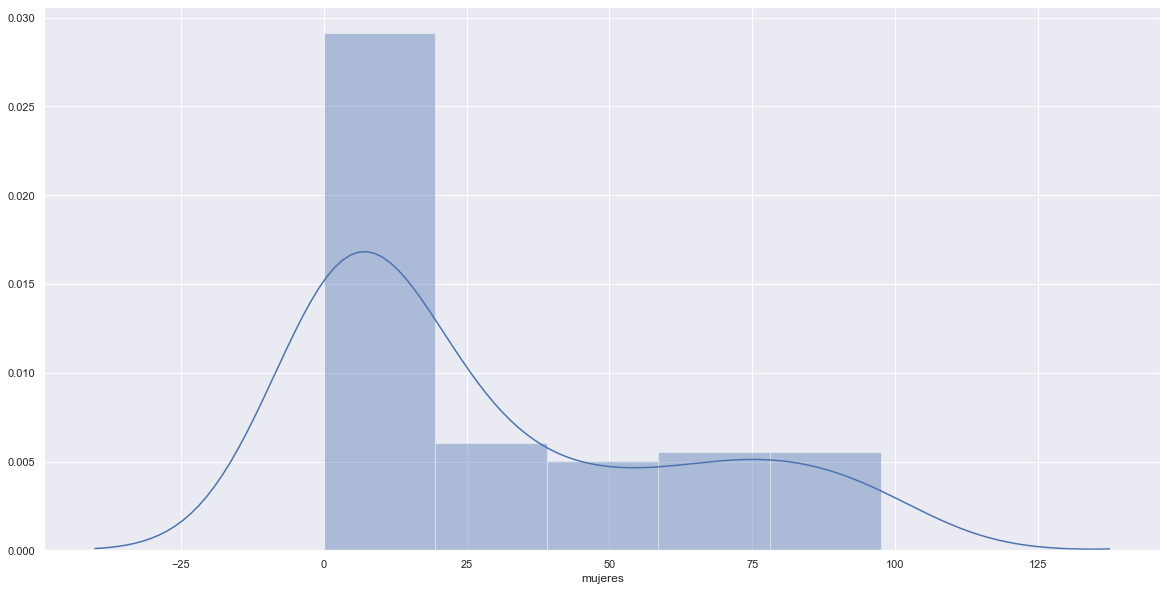

In [27]:
sns.distplot(df.mujeres)

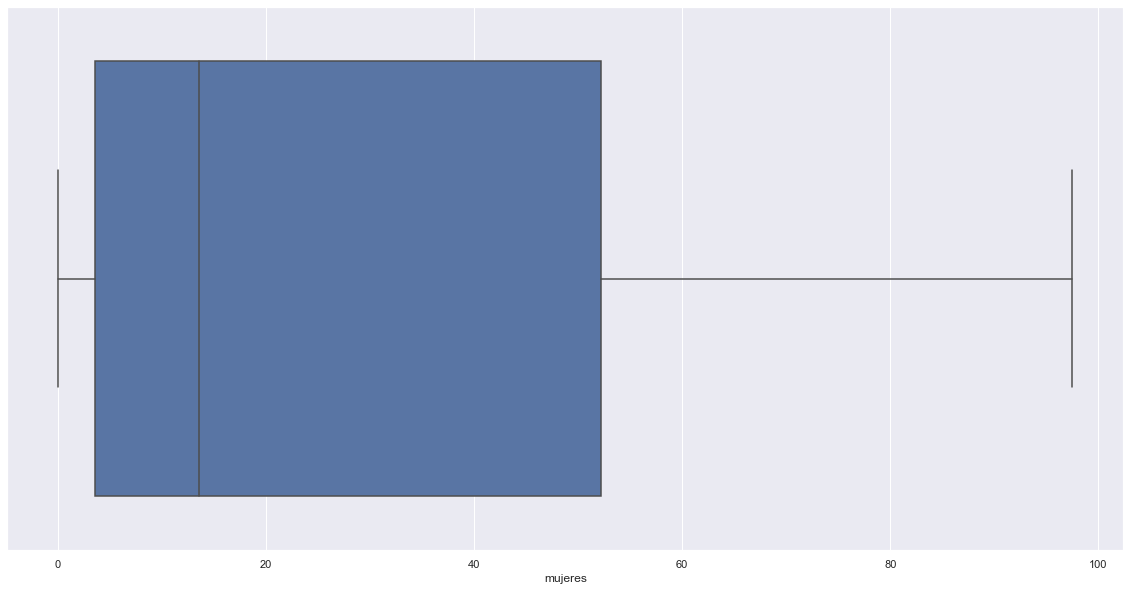

In [28]:
sns.boxplot(df.mujeres)

El anterior gráfico es muy revelador en la categoría de mujeres. Al ser una variable que mide el porcentaje de mujeres por ocupación, se puede observar que el 50% de las ocupaciones incorporan menos de 2 mujeres por cada 10 empleados. Luego, alrededor del 75% de los empleados tienen 5  o menos mujeres cada 10 trabajadores.

### Educacion

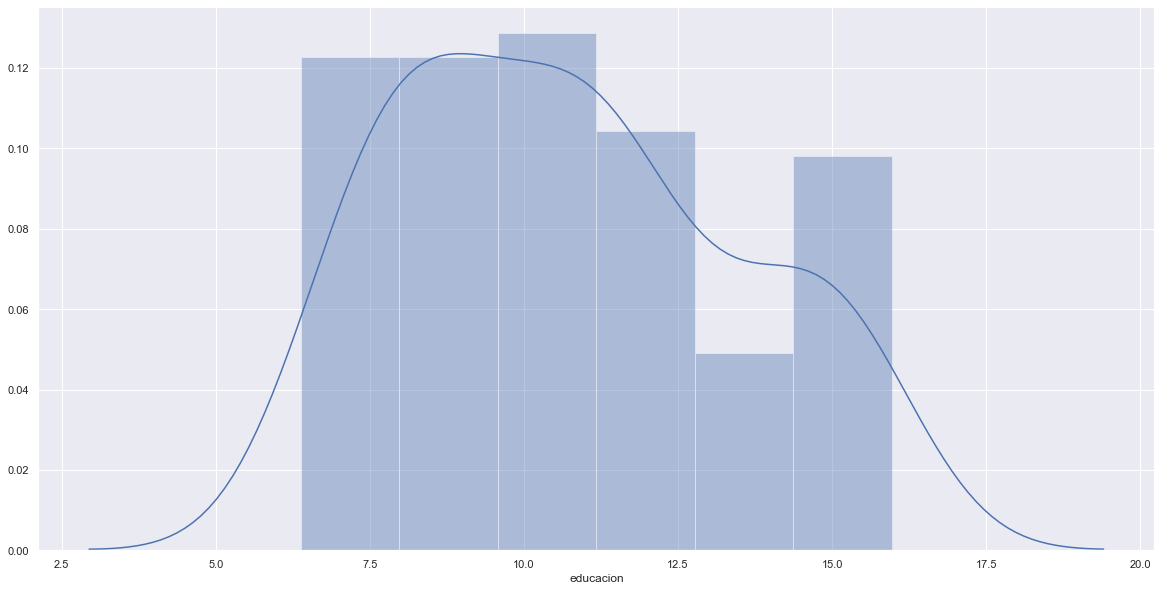

In [45]:
sns.distplot(df.educacion)

La educación es bimodal: gran parte de la muestra tiene una educación más o menos uniforme entre 6 y 11 y un grupo (poco más pequeño) de personas muy educadas.

### Prestigio

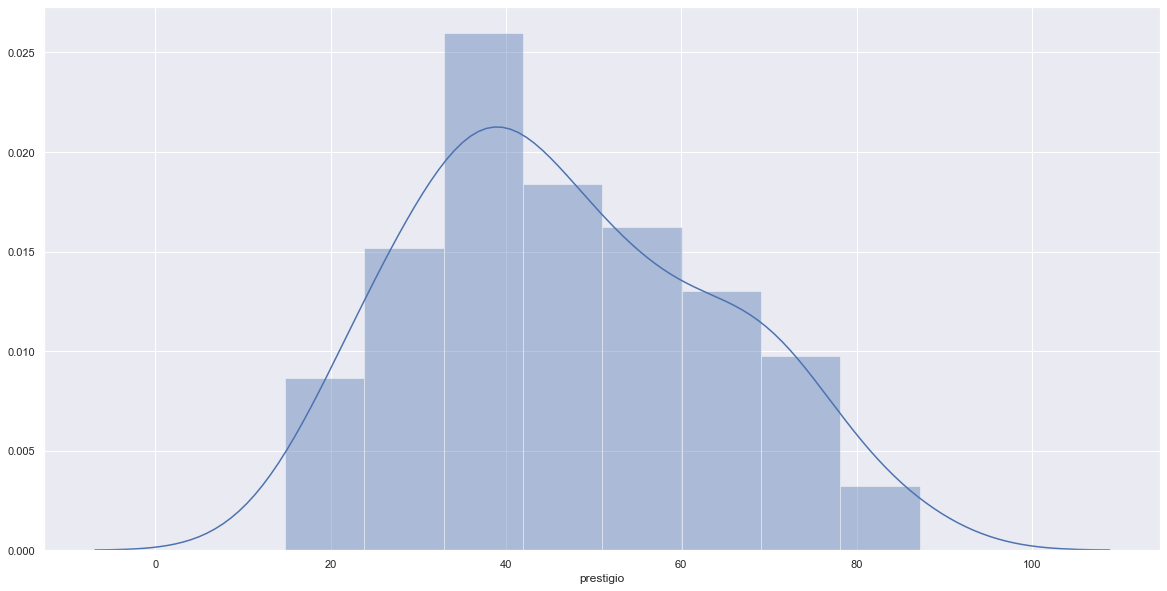

In [34]:
sns.distplot(df.prestigio)

### Tipo

El prestigio de las distintas profesiones tiene sesgo a la derecha y tienen una única moda cerca el 40.

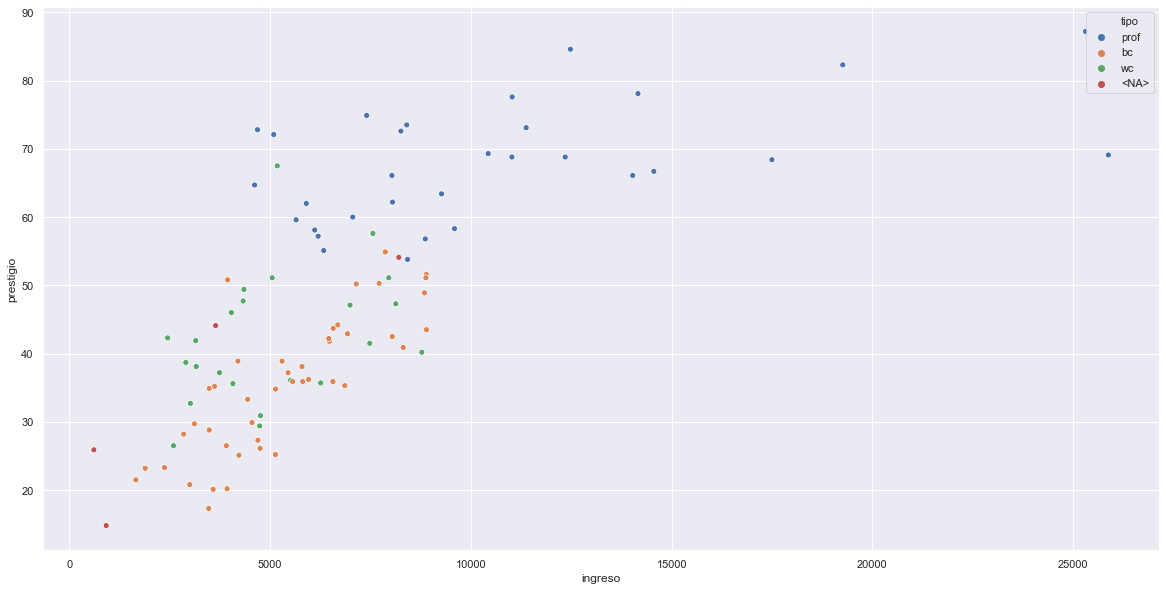

In [88]:
sns.scatterplot(x='ingreso', y='prestigio', hue='tipo', data=df)

En general, las profesiones **blue collar** están en el sector de bajo ingreso y bajo prestigio. Las de profesionista están en rangos más altos de ambas variables.

In [31]:
tipo_to_numeric={'prof':2,'bc':0,'wc':1}
df['tipo_numeric']=df['tipo'].map(tipo_to_numeric)

In [32]:
df['tipo_numeric'] = df.tipo_numeric+np.random.rand(df.shape[0])/10

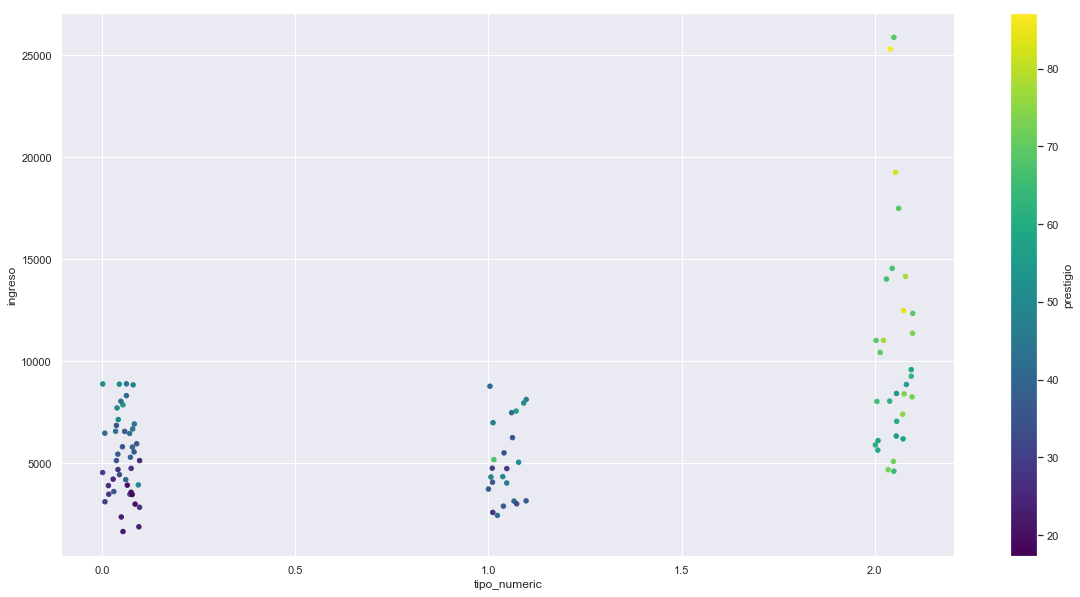

In [33]:
fig, ax = plt.subplots()
df.plot.scatter(x='tipo_numeric',y='ingreso',
                c='prestigio',colormap='viridis',ax=ax)

Los tres distintos tipos de ocupación son: 0 correspondiente al trabajo obrero, 1 correspondiente al oficinista, y 2 al profesional, gerencial o técnico. Es claro que el trabajo de tipo 2 tiene más prestigio que los otros dos. Asimismo, este tipo de trabajo es el único de los tres con ocupaciones que ganen más de 10000. De igual forma, las ocupaciones en esta categoría son mejor remuneradas que las otras dos en un cantidad considerable de casos. Por otra parte, el ingreso percibido por las ocupaciones de tipo obrera y oficinista es prácticamente el mismo. No obstante, el prestigio de los trabajos oficinistas es ligeramente superior.

## Conclusiones

Las conclusiones sobre los datos se encuentran en cada una de las descripciones de las gráficas, consideramos las más importantes las diferencias dadas por el tipo de ocupación y la proporción de mujeres que consideran y la obviedad que a mayor ingreso mayor prestigio.

Trabajar en este proyecto fue muy interesante pues todo lo logramos hacer con el workflow de github en el que cada miembro trabajó en una branch y al final hicimos un merge de todas nuestras aportaciones.